# Ejercicio 1.c

In [153]:
import cv2

In [154]:
import matplotlib.pyplot as plt
import numpy as np

In [155]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

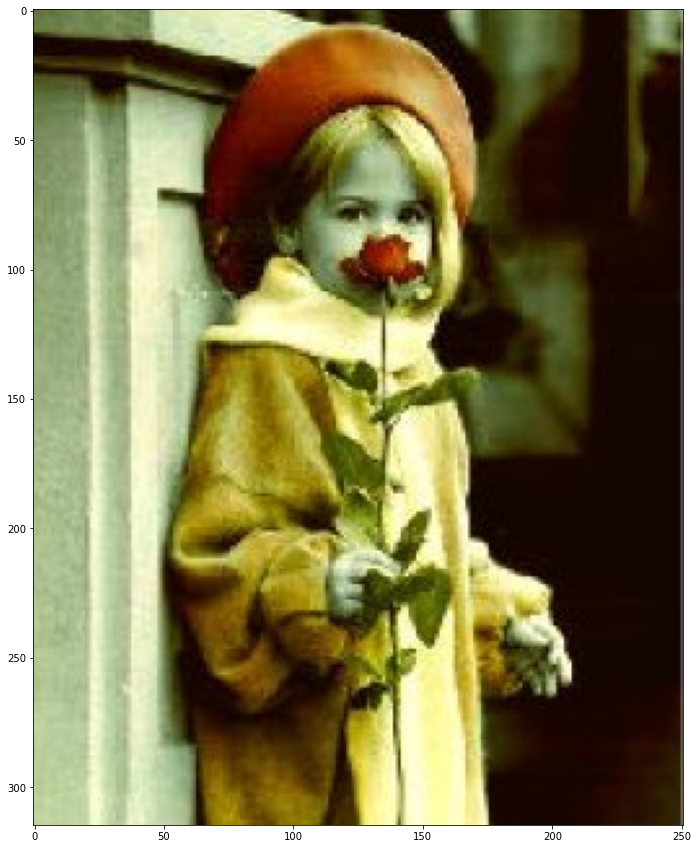

In [353]:
rose = cv2.imread('../resources/ninia_y_rosa.jpg')
rose = cv2.cvtColor(rose, cv2.COLOR_BGR2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(rose)
plt.show()

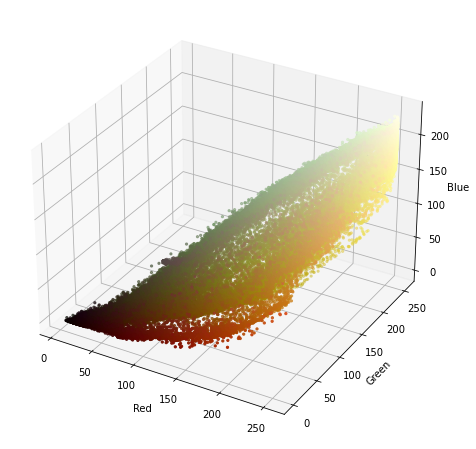

In [157]:
r, g, b = cv2.split(rose)

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = rose.reshape((np.shape(rose)[0] * np.shape(rose)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Se puede observar que el color rojo està muy mezclado con el resto, probamos en espacio HSV

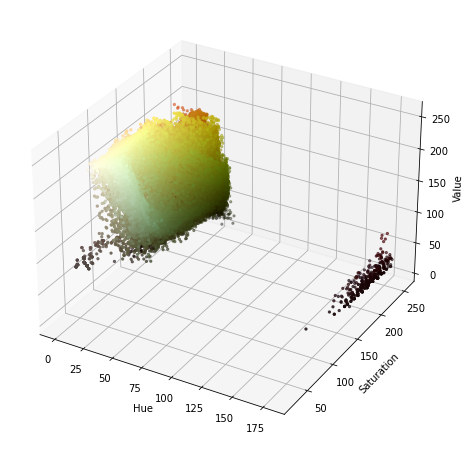

In [158]:
hsv_rose = cv2.cvtColor(rose, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_rose)

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Separamos la imagen en los siguientes rangos

In [284]:
light_red = (16, 255, 205)
dark_red = (1, 150, 0)

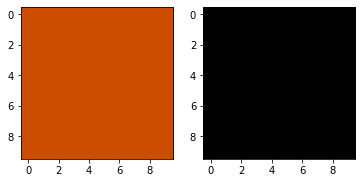

In [285]:
lr_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255.0
dr_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lr_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dr_square))
plt.show()

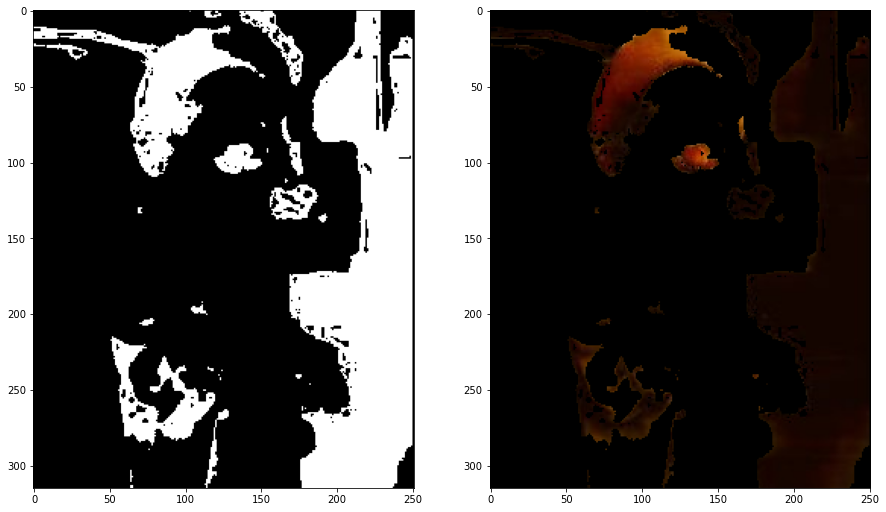

In [294]:
mask_red = cv2.inRange(hsv_rose, dark_red, light_red)
result_red = cv2.bitwise_and(rose, rose, mask=mask_red)
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.subplot(1, 2, 1)
plt.imshow(mask_red, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_red)
plt.show()

Se observa que la imagen posee colores muy similares al de la rosa en distintos lugares por lo tanto se procede a aplicar una mascara al sector donde esta la rosa.

In [345]:
for i in range(315):
    for j in range(len(mask_red[1])):
        if(i<80 or i>115 or j<115 or j>150):
            mask_red[i,j] = 0

## Se le saca la rosa a la imagen original y se la convierte a gris

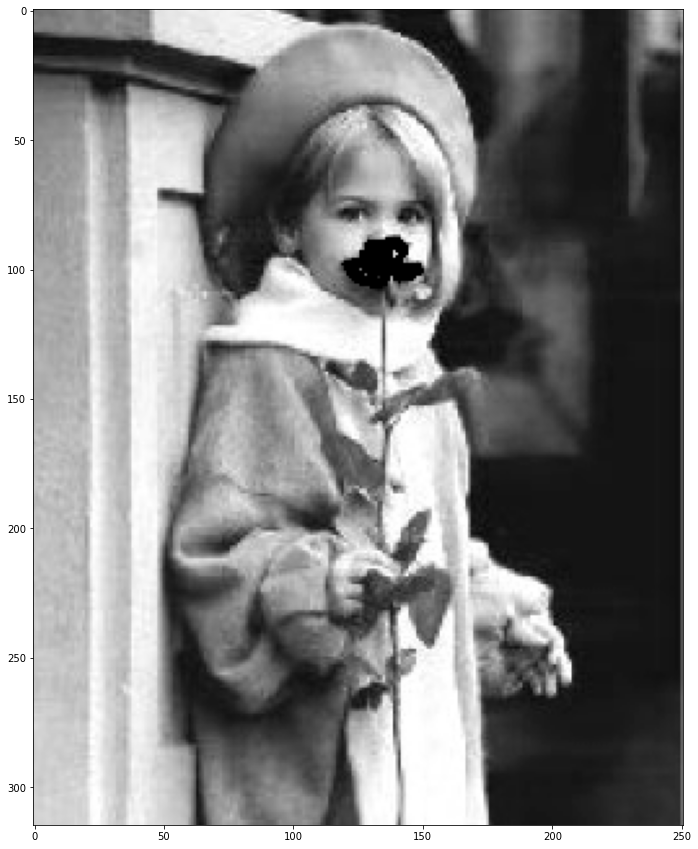

In [375]:
mask_inv = cv2.bitwise_not(mask_red)
no_rose = cv2.bitwise_and(rose, rose, mask=mask_inv)
no_rose = cv2.cvtColor(no_rose, cv2.COLOR_RGB2HSV)
no_rose[:,:,1] = 0
no_rose_gray = cv2.cvtColor(no_rose, cv2.COLOR_HSV2RGB)

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(no_rose_gray)
plt.show()

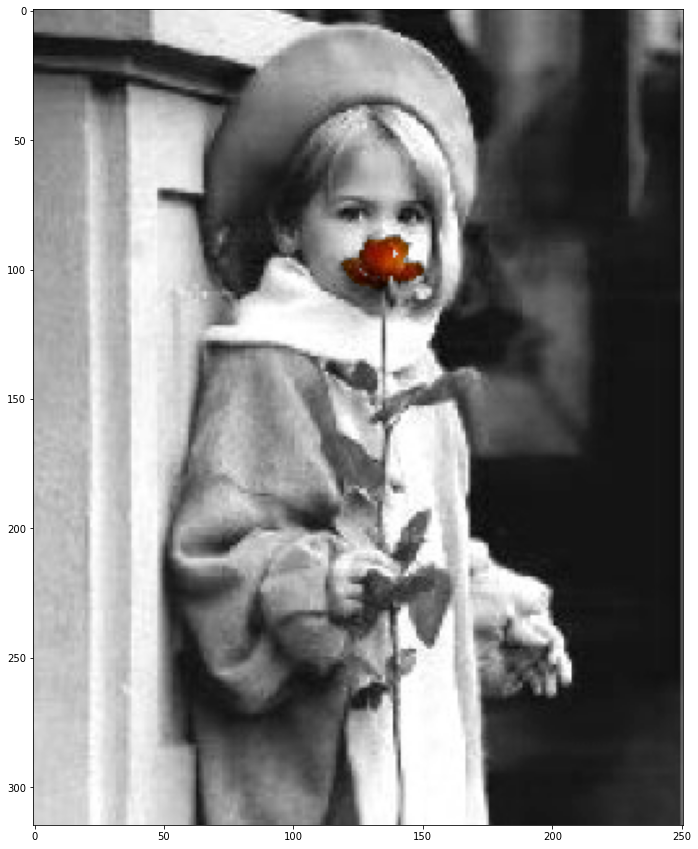

In [377]:
only_rose = cv2.bitwise_and(rose, rose, mask=mask_red)
final_result = no_rose_gray + only_rose

fig = plt.figure()
fig.set_size_inches(15, 15)
plt.imshow(final_result)
plt.show()